# Neural Network for Sentiment Analysis

## Experimenting with word embeddings - 50 dim

In [1]:
import numpy as np
import pandas as pd
import dill as pickle
from nn import neuralNetwork
from train_test import train_nn, evaluate_nn
from utils_word_embeddings_50d import read_word_embbedding,get_mean_embedding
from nltk.tokenize import word_tokenize

### Loading data

In [2]:
training_file = "./sephora-data/sa-reviews_training.csv"
dev_file = "./sephora-data/sa-reviews_dev.csv"
test_file = "./sephora-data/sa-reviews_test.csv"

In [3]:
df_training = pd.read_csv(training_file)
df_dev = pd.read_csv(dev_file)
df_test = pd.read_csv(test_file)

In [4]:
#there is a review in Russian that after many trials, is still being saved in the final file
df_training.dropna(inplace=True) 
df_training = df_training.reset_index(drop = True)

### Loading WE model

In [5]:
model = read_word_embbedding("./models/glove.6B.50d.txt")

### Extracting word embeddings

In [6]:
# tokenizing the text in review(tokenization)
df_training['tokenized_text'] = df_training['preprocessed_text'].apply(word_tokenize)
df_dev['tokenized_text'] = df_dev['preprocessed_text'].apply(word_tokenize)
df_test['tokenized_text'] = df_test['preprocessed_text'].apply(word_tokenize)

# getting word embeddings for each review
df_training['review_embedding'] = df_training['tokenized_text'].apply(get_mean_embedding)
df_dev['review_embedding'] = df_dev['tokenized_text'].apply(get_mean_embedding)
df_test['review_embedding'] = df_test['tokenized_text'].apply(get_mean_embedding)


In [7]:
# Prepare input for neural network
feat_vectorized_train = np.stack(df_training['review_embedding'].to_numpy())
gold_labels_train = df_training['label'].to_numpy()
feat_vectorized_dev = np.stack(df_dev['review_embedding'].to_numpy())
gold_labels_dev = df_dev['label'].to_numpy()
feat_vectorized_test = np.stack(df_test['review_embedding'].to_numpy())
gold_labels_test = df_test['label'].to_numpy()

### Defining the Neural Network parameters

In [8]:
# number of input, hidden and output nodes
input_nodes = 50 #this is the size of the word embedding vector applied to extract the mean we
hidden_nodes = 30
output_nodes = 1

# learning rate
learning_rate = 0.01

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

### Training the Neural Network

Epoch 1/10, Elapsed Time: 0:00:00, Accuracy: 0.6775210703129605
Epoch 2/10, Elapsed Time: 0:00:00, Accuracy: 0.6984735073967112
Epoch 3/10, Elapsed Time: 0:00:00, Accuracy: 0.7075794188719279
Epoch 4/10, Elapsed Time: 0:00:00, Accuracy: 0.7107620675428773
Epoch 5/10, Elapsed Time: 0:00:00, Accuracy: 0.7136205575528968
Epoch 6/10, Elapsed Time: 0:00:00, Accuracy: 0.7156833853951788
Epoch 7/10, Elapsed Time: 0:00:00, Accuracy: 0.7164201096245654
Epoch 8/10, Elapsed Time: 0:00:00, Accuracy: 0.7170684269464254
Epoch 9/10, Elapsed Time: 0:00:00, Accuracy: 0.7174809925148818
Epoch 10/10, Elapsed Time: 0:00:00, Accuracy: 0.7178935580833382


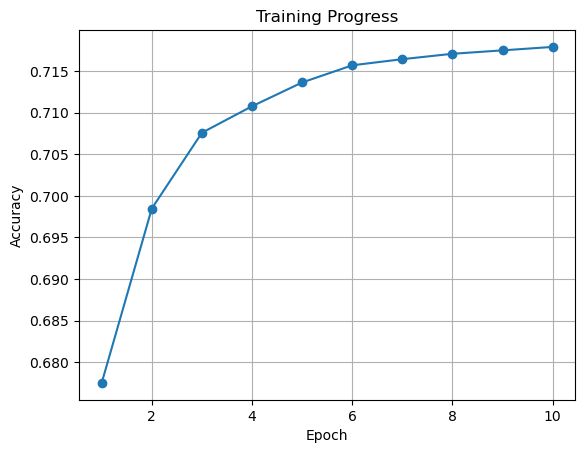

In [9]:
epochs = 10
nn_mean_we = train_nn(n, feat_vectorized_train, gold_labels_train, epochs)

In [10]:
# saving the trained neural network to a file
pkl_filename = './models/nn_mean_we_model_50d.pkl'
with open(pkl_filename, 'wb') as file:
     pickle.dump(nn_mean_we, file)

### Evaluating the perfomance on validation set

In [11]:
# load from file
pkl_filename = './models/nn_mean_we_model_50d.pkl'
with open(pkl_filename, 'rb') as file:
    nn_mean_we_50d = pickle.load(file)

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.74      0.72      2986
           1       0.73      0.71      0.72      3003

    accuracy                           0.72      5989
   macro avg       0.72      0.72      0.72      5989
weighted avg       0.72      0.72      0.72      5989

[[2198  788]
 [ 885 2118]]


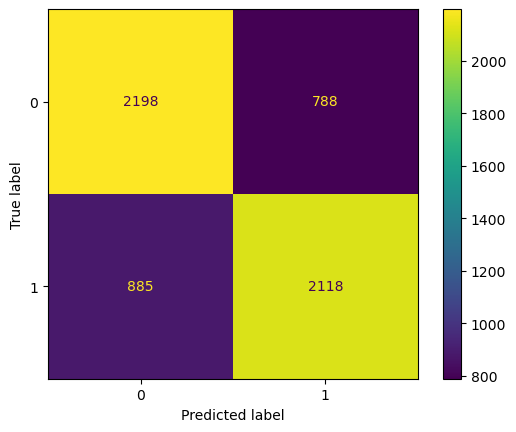

In [12]:
evaluate_nn(nn_mean_we_50d, feat_vectorized_dev, gold_labels_dev)

## Evaluation on test dataset

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.73      0.72      4993
           1       0.73      0.72      0.72      4988

    accuracy                           0.72      9981
   macro avg       0.72      0.72      0.72      9981
weighted avg       0.72      0.72      0.72      9981

[[3641 1352]
 [1420 3568]]


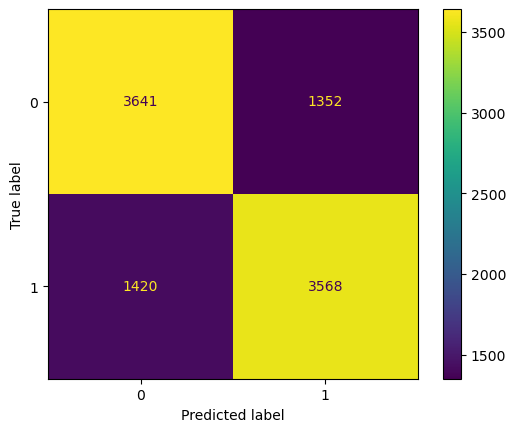

In [13]:
evaluate_nn(nn_mean_we_50d, feat_vectorized_test, gold_labels_test)

In [14]:
####